In [45]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
conn = psql.connect(dbname='datawarehouse',
                       host='localhost', user='gabriel', password='gyfu')

In [46]:
cur = conn.cursor()
cur.execute('select d.month, d.year, count(f.*) from fires f left join date d on d.id = f.dateid group by d.month, d.year order by d.year, d.month asc;')
firesMonth = cur.fetchall()
cur.close()
cur = conn.cursor()
cur.execute("select d.month, d.year, wc.temperaturechange, wc.standarddeviation from weatherchange wc left join date d on d.id = wc.dateid where wc.period = 'm' order by d.year, d.month asc;")
tChange = cur.fetchall()
cur.close()
conn.close()

In [47]:
date = []
count = []
for day in firesMonth:
    date.append((day[0], day[1]))
    count.append(day[2])

firesMonthDB = pd.DataFrame(data={'date': date, 'count': count})

date = []
temChange = []
stdDeviation = []
for day in tChange:
    date.append((day[0], day[1]))
    temChange.append(day[2])
    stdDeviation.append(day[3])

weatherChangeDB = pd.DataFrame(data={'date': date, 'temChange': temChange, 'stdDeviation': stdDeviation})

In [48]:
firesMonthDB = firesMonthDB.set_index('date')
weatherChangeDB = weatherChangeDB.set_index('date')
fireXTempChangeDB = weatherChangeDB.merge(firesMonthDB, left_index=True, right_index=True)
fireXTempChangeDB[['temChange','stdDeviation']] = fireXTempChangeDB[['temChange','stdDeviation']].astype(float)
fireXTempChangeDB

,temChange,stdDeviation,count
date,,,
"(1, 2008)",1.3,0.6,469
"(2, 2008)",-0.4,0.6,356
"(3, 2008)",0.6,0.5,1234
"(4, 2008)",-0.3,0.6,4832
"(5, 2008)",0.7,0.8,2283
...,...,...,...
"(2, 2017)",0.7,0.6,1246
"(3, 2017)",1.7,0.5,2619
"(4, 2017)",0.2,0.6,7099


<AxesSubplot:>

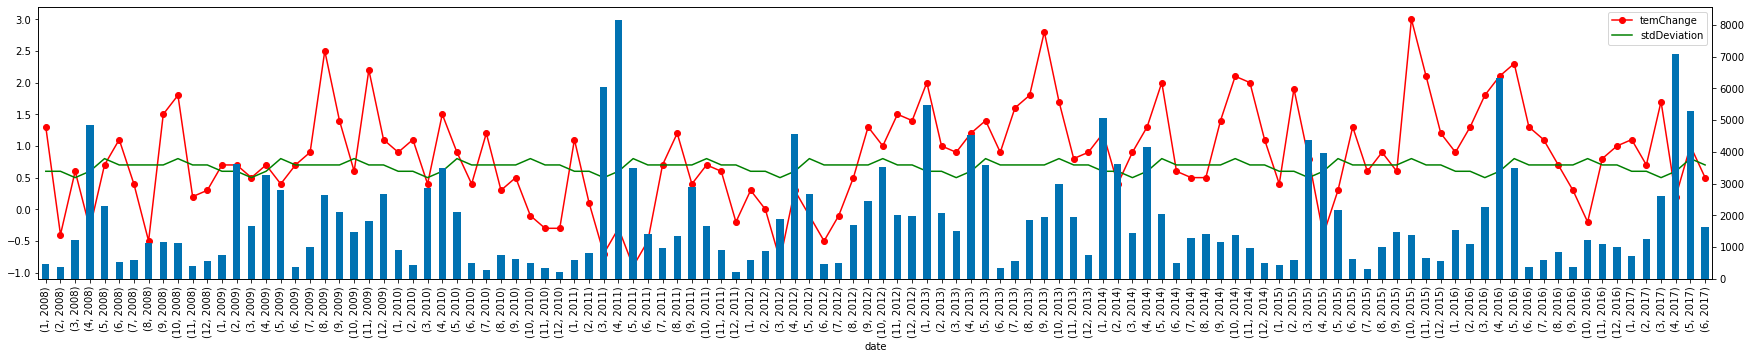

In [59]:
fireXTempChangeDB.plot(y=['temChange', 'stdDeviation'], figsize=(30,5), style=['o-', ''], color=['red', 'green'])
fireXTempChangeDB['count'].plot(kind='bar', secondary_y=True)